In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X=np.array([-7.,-4.,-2.,0.,2.,4.,6.,8.,10.])
y=np.array([3,6.,8.,10.,12.,14.,16.,18.,20.])


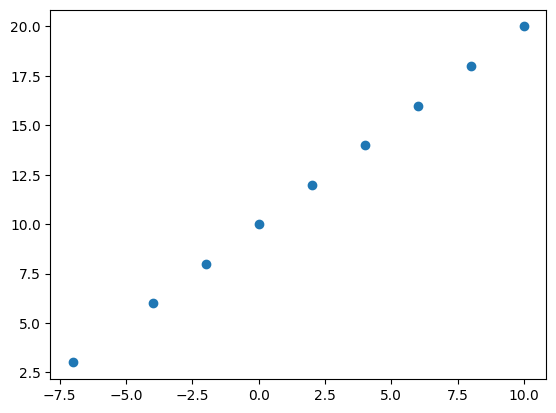

In [ ]:
plt.scatter(X,y);

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X= tf.constant(X)
y=tf.constant(y)

## Steps in Modelling:
1. Creating a model
2. Compiling a model
  * Define loss function
  * Optimizer like Adam
  * Evaluation metrices
3. Fitting the Model

In [ ]:
# setting random seed
tf.random.set_seed(42)
#creating a model using sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), #sochastic graduent descent
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 344ms/step - loss: 8.8276 - mae: 8.8276
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.7819 - mae: 8.7819
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.7362 - mae: 8.7362
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 8.6906 - mae: 8.6906
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6449 - mae: 8.6449


In [ ]:
pred=model.predict([17])

1/1 [==============================] - 0s 71ms/step


In [ ]:
pred

array([[29.20712]], dtype=float32)

## Improving a Model
We can improve the model by altering the steps we took to build the model.
1. **Creating a model:** Here we might add more hidden layers, increase the number of neurons in each hidden layer , change the activation function of each layer.
2. **Compiling the Model:** Here we might change the optimization function or the learning rate of each optimization function.
3. **Fitting the Model:** Here we might fit the edit for more epochs (leave it training for longer) or increase the amount of data.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1), tf.expand_dims(y,axis=-1), epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 15.9940 - mae: 15.9940
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 15.9898 - mae: 15.9898
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 15.9855 - mae: 15.9855
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9813 - mae: 15.9813
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9771 - mae: 15.9771
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.9729 - mae: 15.9729
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 15.9686 - mae: 15.9686
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 15.9644 - mae: 15.9644
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 15.9602 - mae: 15.9602
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 15.9560 - mae: 15.9560
Epoch 11/100
1/1 [==============================]

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 62ms/step


array([[-21.750841]], dtype=float32)

In [ ]:
#rebuilding the model again
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 731ms/step - loss: 11.7040 - mae: 11.7040
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6720 - mae: 11.6720
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6382 - mae: 11.6382
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6019 - mae: 11.6019
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5632 - mae: 11.5632
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5219 - mae: 11.5219
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4776 - mae: 11.4776
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4301 - mae: 11.4301
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3791 - mae: 11.3791
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3244 - mae: 11.3244
Epoch 11/100
1/1 [==============================]

In [ ]:
preds=model.predict([8.])

1/1 [==============================] - 0s 115ms/step


In [ ]:
np.median(preds)

18.075666

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.1))

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 874ms/step - loss: 11.7409
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7635
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3584
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0810
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9962
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0507
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.2982
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 4.8420
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9044
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.4074
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 4.1378
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 4.0268
Epoch 13/100
1/1 [==============================] 

In [ ]:
model.predict([18.])

1/1 [==============================] - 0s 97ms/step


array([[30.610806, 29.491703, 30.93083 , 28.513165, 31.744465, 29.433075,
        29.715221, 32.09309 , 28.198448, 29.832153, 30.130396, 29.26178 ,
        27.497663, 28.783537, 27.307253, 30.74146 , 30.83123 , 32.114986,
        28.97984 , 29.288994, 30.782398, 31.020939, 29.496508, 30.188414,
        27.939798, 27.716118, 30.434116, 30.743494, 27.969742, 31.522188,
        30.13821 , 31.122875, 29.688911, 30.102028, 28.690653, 30.707586,
        30.989496, 28.608078, 30.822731, 30.921638, 29.549957, 30.85514 ,
        28.569826, 28.20118 , 28.109255, 27.504974, 30.795479, 29.737123,
        30.527523, 30.709316, 28.894827, 30.330774, 29.96868 , 29.347126,
        28.940186, 31.687872, 29.077223, 29.922619, 31.138693, 28.5974  ,
        27.852745, 31.107239, 29.854694, 29.356606, 30.620813, 31.946177,
        29.268974, 27.546848, 30.086628, 29.91529 , 30.1972  , 28.186886,
        30.912262, 28.690992, 28.93637 , 31.155884, 29.975437, 29.564737,
        31.210344, 30.890726, 29.83241

In [ ]:
np.median(model.predict([18.]))

1/1 [==============================] - 0s 38ms/step


29.843555

In [ ]:
X= tf.range(-100,100,2)

In [ ]:
y=X+10

In [ ]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [ ]:
X_train

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58], dtype=int32)>

In [ ]:
y_train

<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
       -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
       -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14,
       -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,
        14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,
        40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,
        66,  68], dtype=int32)>

In [ ]:
X_train==y_train-10

<tf.Tensor: shape=(80,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])>

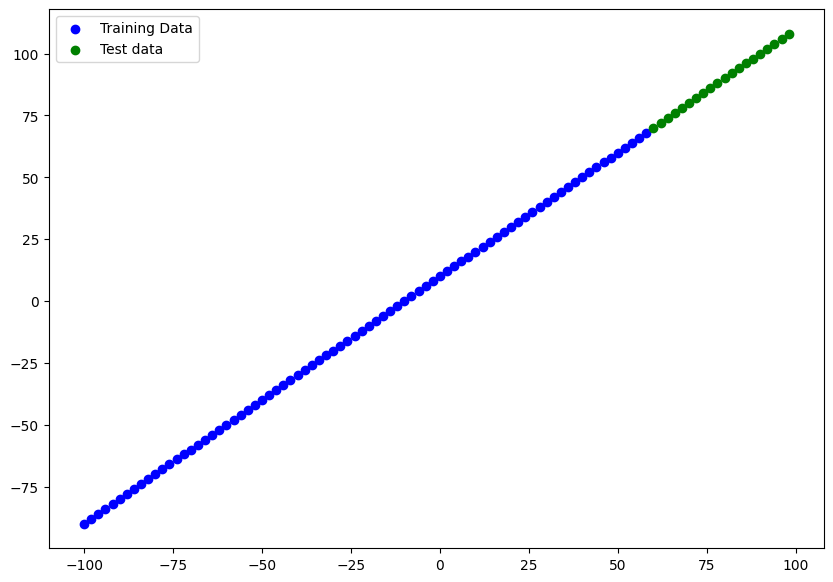

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()

In [ ]:
model=tf.keras.Sequential(name="Hehehe")
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation=None))


model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.predict([18])

1/1 [==============================] - 0s 72ms/step


array([[26.272514]], dtype=float32)

In [ ]:
model.summary()

Model: "Hehehe"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                100       
                                                                 
 dense_36 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


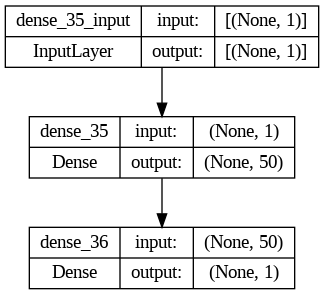

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True
           )

## Plotting predictions

In [ ]:
def plot_preds(y_preds,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
  plt.figure(figsize=(10,5))
  plt.scatter(X_train, y_train, c='b', label='Training Data')
  plt.scatter(X_test, y_test, c="g", label= 'Testing Data')
  plt.scatter(X_test, y_preds, c="red", label="Predictions")
  plt.legend();

In [ ]:
y_preds=model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [ ]:
len(y_preds)

20

In [ ]:
y_preds=model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
        96,  98, 100, 102, 104, 106, 108], dtype=int32)>

## Evaluating our model predictions with regression metrics:
There are two main regression evaluation metrices:
1. MAE(Mean Absolute error)
2. MSE(Mean squared Error(Square of the average error(used to get rid of big errors)))

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 124ms/step - loss: 6.2404 - mae: 6.2404


[6.240367889404297, 6.240367889404297]

In [ ]:
tf.keras.losses.mae(y_test, y_preds) #Gives a strange output becaue of one extra dimension of y_preds than y_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([23.840431 , 21.98787  , 20.1353   , 18.354458 , 16.743896 ,
       15.303827 , 14.034358 , 12.935478 , 12.009037 , 11.266275 ,
       10.693988 , 10.292181 , 10.060852 , 10.       , 10.109621 ,
       10.389719 , 10.840289 , 11.4613495, 12.252914 , 13.214975 ],
      dtype=float32)>

In [ ]:
tf.keras.losses.mae(y_true=y_test,
                    y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=6.240368>

In [ ]:
tf.keras.losses.mse(y_true=y_test,
                    y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=39.6649>

In [ ]:
def evaluate(y_true, y_pred):
  """
  Evaluates the model on regression metrices and returns MAE and MAE.

  Parameters:
  y_true: True labels
  y_pred: Predicted labels
  """
  mae= tf.keras.losses.mae(y_true, y_pred)
  mse= tf.keras.losses.mse(y_true, y_pred)
  print(f"The Mean Absolute Error of the model is: {mae}.")
  print(f"The Mean Squared Error of the model is: {mse}.")
  return mae.numpy(), mse.numpy()


## Running Experiments to improve our model
```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it....
```
1. Get more data
2. Enlarge the model(More hidden layers, more units in each layer)
3. Enlarge Model training (more epochs)

## Modelling experiments
We'll build 3 diff models to compare them and check how to improve them.
* `model_1`: 1 layer with 100 epochs
* `model_2` : 2 layers with 100 epochs . 1st layer with 50 hidden units
* `model_3` : 2 layers with 200 epochs.


## `model_1`

In [ ]:
model_1 = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model_1.compile(loss='mae',
              optimizer= tf.keras.optimizers.SGD())

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 10.0000
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 10.0000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 10.0000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 10.0000
Epoch 13/100
3/3 [==============================]

In [ ]:
preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 35ms/step


## `model_2`

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(50))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss="mae",
              optimizer= tf.keras.optimizers.SGD())

model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
preds_2= model_2.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 74ms/step


## `model_3`

In [ ]:
model_3= tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(50))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD())

model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=200, verbose=0)

In [ ]:
preds_3=model_3.predict(X_test)

1/1 [==============================] - 0s 75ms/step


In [ ]:
model_1_mae, model_1_mse = evaluate(y_test,preds_1)
model_2_mae, model_2_mse= evaluate(y_test, tf.squeeze(preds_2,axis=-1))
model_3_mae, model_3_mse=evaluate(y_test, tf.squeeze(preds_3,axis=-1))

The Mean Absolute Error of the model is: 10.
The Mean Squared Error of the model is: 100.
The Mean Absolute Error of the model is: 49.7374382019043.
The Mean Squared Error of the model is: 2511.28173828125.
The Mean Absolute Error of the model is: 4.436951160430908.
The Mean Squared Error of the model is: 19.704517364501953.


In [ ]:
import pandas as pd

In [ ]:
scores_list=[["model_1", model_1_mae, model_2_mse],
             ["model_2", model_2_mae, model_2_mse],
             ["model_3", model_3_mae, model_3_mse]]

In [ ]:
df = pd.DataFrame(data=scores_list, columns=["Model", "MAE", "MSE"])

In [ ]:
df

,Model,MAE,MSE
0,model_1,10.000000,2511.281738
1,model_2,49.737438,2511.281738
2,model_3,4.436951,19.704517


In [ ]:
plot_preds

<function __main__.plot_preds(y_preds, X_train=<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58], dtype=int32)>, X_test=<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92,
       94, 96, 98], dtype=int32)>, y_train=<tf.Tensor: shape=(80,), dtype=int32, numpy=
array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
       -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -4

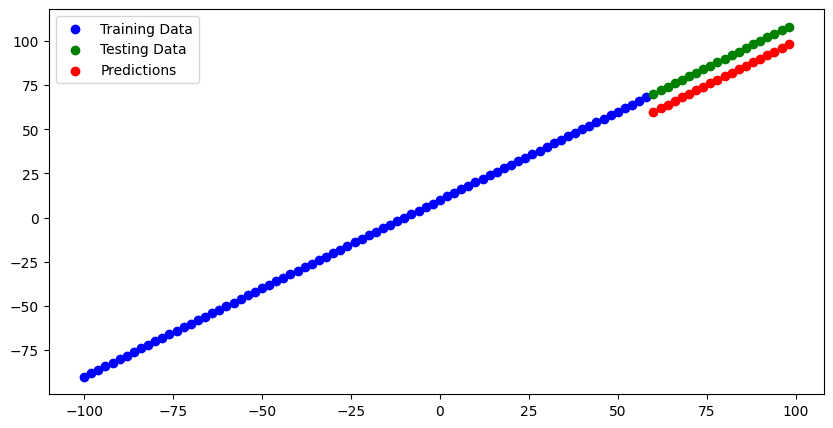

In [ ]:
plot_preds(preds_1)

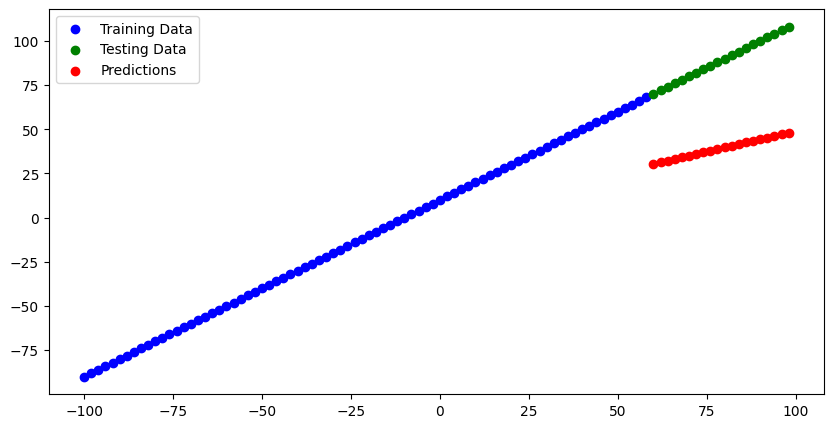

In [ ]:
plot_preds(preds_2)

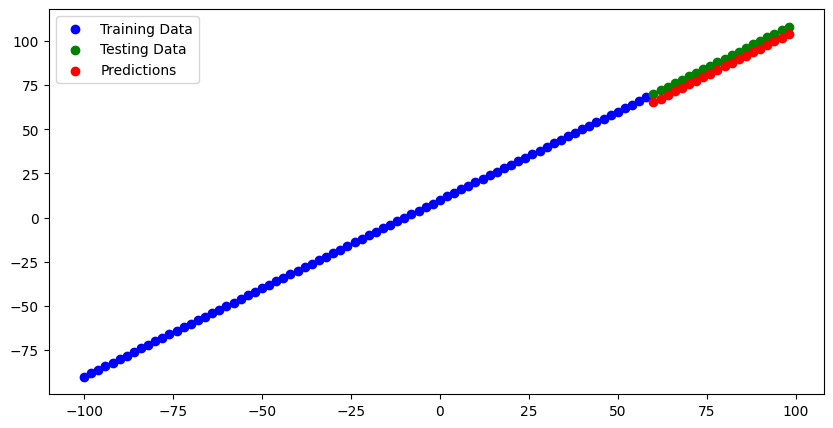

In [ ]:
plot_preds(preds_3)

## Saving and Loading a model

### 1. Savedmodelformat method

In [ ]:
model_1.save("SavedModelMethod_model_1")

### 2. HD5 format

In [ ]:
model_1.save("model_1.h5")

### Loading Model

In [ ]:
loaded_model= tf.keras.models.load_model("model_1.h5")

In [ ]:
# loaded_model_2= tf.keras.models.load_model("/content/SavedModelMethod_model_1") # will figure this out later

### comparing both models before and after saving

In [ ]:
preds_1==loaded_model.predict(X_test)

1/1 [==============================] - 0s 109ms/step


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Download A model to computer
There are 3 ways of doing this:
1. Simply right click on the model and click download.
2. use `google.colab.files` module
3. copy the model to google drive

In [ ]:
from google.colab import files

In [ ]:
# files.download("/content/model_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !cp /content/model_1.h5 /content/drive/MyDrive/models

In [ ]:
# !ls /content/drive/MyDrive/models

model_1.h5


# A Larger Example

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance= pd.get_dummies(insurance)

In [ ]:
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X= insurance.drop("charges", axis=1)
y=insurance["charges"]

In [ ]:
tf.random.set_seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [ ]:
X_train.shape, y_train.shape

((1070, 11), (1070,))

In [ ]:
X_test.shape, y_test.shape

((268, 11), (268,))

## Modelling

In [ ]:
model_0 = tf.keras.Sequential()
model_0.add(tf.keras.layers.Dense(20))
model_0.add(tf.keras.layers.Dense(1))

model_0.compile(loss="mae",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["mae"])

model_0.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
y_preds=model_0.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
mae, mse= evaluate(y_test, tf.squeeze(y_preds))

The Mean Absolute Error of the model is: 7453.04443359375.
The Mean Squared Error of the model is: 166526848.0.


## Improving Model
Remember the 3 steps in improving model....

In [ ]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(), # SGD() gives loss:nan so we'll use Adam()
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13124.0586 - mae: 13124.0586
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12868.3369 - mae: 12868.3369
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12282.8691 - mae: 12282.8691
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11099.8379 - mae: 11099.8379
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9359.9326 - mae: 9359.9326
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7899.0747 - mae: 7899.0747
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7441.4609 - mae: 7441.4609
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7389.7627 - mae: 7389.7627
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7363.0942 - mae: 7363.0942
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7335.8730 - mae: 7

In [ ]:
model_0.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7453.0439 - mae: 7453.0439


[7453.0439453125, 7453.0439453125]

In [ ]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3929.0784 - mae: 3929.0784


[3929.078369140625, 3929.078369140625]

In [ ]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

history=model_2.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 2ms/step - loss: 10856.0967 - mae: 10856.0967
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 7489.2661 - mae: 7489.2661
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 7094.3975 - mae: 7094.3975
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 6751.9717 - mae: 6751.9717
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 6412.6665 - mae: 6412.6665
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 6266.0488 - mae: 6266.0488
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 6100.6348 - mae: 6100.6348
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 5896.0166 - mae: 5896.0166
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 5588.9082 - mae: 5588.9082
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 5145.2114 - mae: 5145.21

In [ ]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3248.7769 - mae: 3248.7769


[3248.77685546875, 3248.77685546875]

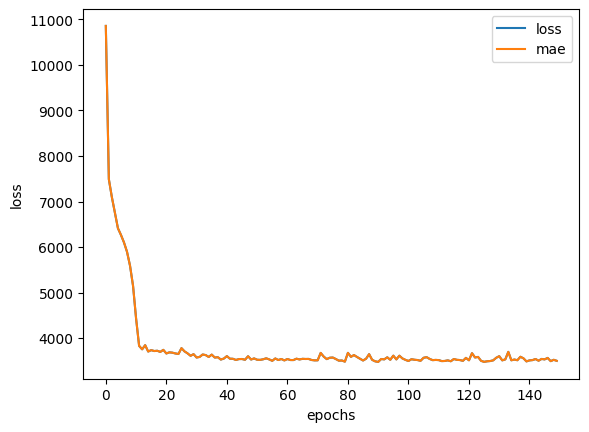

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Normalization and standardization
Normalization in machine learning is done to the data to scale it in the similar range so that model learn better patterns. And standardization brings the data to a normal distribution(but reduce the effect of outliers).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #MinMaxScaler scales numerical features b/w a specific range(0,1) while OneHotEncoder does what u know.
from sklearn.compose import make_column_transformer # Column transformer is going to tranform or dit the columns and apply the particular transformers to the data in those columns

In [ ]:
ct= make_column_transformer((MinMaxScaler(),['age','bmi','children']),
                            (OneHotEncoder(handle_unknown='ignore'), ['sex','region','smoker'])
                            )

In [ ]:
X= insurance.drop("charges", axis=1)
y=insurance["charges"]

🔑**Note:** First we should split the data between training and testing splits then transform so it does not inherit any order from the training data.

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

Now we'll transform the data

In [ ]:
ct.fit(X_train) # Fit the transformer to the training data

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'region', 'smoker'])])

In [ ]:
X_train= ct.transform(X_train) #Now transforming the training data.

In [ ]:
X_test=ct.transform(X_test)

In [ ]:
X_train[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

Now we have transformed and One Hot encoded the data. Lets pass it to a model

In [ ]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

model_4.fit(X_train, y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 2s 5ms/step - loss: 13154.2373 - mae: 13154.2373
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 10361.7324 - mae: 10361.7324
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: 7796.6611 - mae: 7796.6611
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 7270.9443 - mae: 7270.9443
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 6536.4648 - mae: 6536.4648
Epoch 6/150
34/34 [==============================] - 0s 6ms/step - loss: 5356.5913 - mae: 5356.5913
Epoch 7/150
34/34 [==============================] - 0s 5ms/step - loss: 4035.0845 - mae: 4035.0845
Epoch 8/150
34/34 [==============================] - 0s 8ms/step - loss: 3673.7476 - mae: 3673.7476
Epoch 9/150
34/34 [==============================] - 0s 5ms/step - loss: 3640.6323 - mae: 3640.6323
Epoch 10/150
34/34 [==============================] - 0s 5ms/step - loss: 3633.5520 - mae: 3633.

In [ ]:
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3155.6575 - mae: 3155.6575


[3155.657470703125, 3155.657470703125]

🔑**Note:** we saw that the model got improved so apart from the before experiments, we can alter and normalize data which might improve the model.